# Overview

We will use a rolling average model, with a time period of one week, for the Sonona and Austin intake and outcomes data. Our baseline model will be the assumption that 2024 will be similar to 2023. Most shelter statistics we found are year-over-year comparisons.

# Rolling average forecast

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from seaborn import set_style
from sklearn.metrics import mean_squared_error

set_style("whitegrid")

In [139]:
#read in shelter data 
shelter_data = pd.read_csv("../main_data/CleanedDataOnePlace.csv")

# Convert 'Date' column to datetime objects
shelter_data['Date'] = pd.to_datetime(shelter_data['Date'])

/var/folders/rl/kqt6tbv90l9_pwc4927vdb340000gn/T/ipykernel_91255/48356966.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  shelter_data['Date'] = pd.to_datetime(shelter_data['Date'])


In [140]:
# find the index with Jan 1, 2024

first_day24 = shelter_data[shelter_data['Date'] == '2024-01-01'].index[0]
print(first_day24)

3744


In [141]:
shelter_train = shelter_data.iloc[:first_day24].copy()
shelter_test = shelter_data.iloc[first_day24:].copy()

In [142]:
# checking our split worked
print(shelter_train)

           Date  SonomaIntakeTotals  SonomaOutcomeTotals  SonomaDifferences  \
0    2013-10-01                 NaN                  NaN                NaN   
1    2013-10-02                 NaN                  NaN                NaN   
2    2013-10-03                 NaN                  NaN                NaN   
3    2013-10-04                 NaN                  NaN                NaN   
4    2013-10-05                 NaN                  NaN                NaN   
...         ...                 ...                  ...                ...   
3739 2023-12-27                 2.0                  1.0                1.0   
3740 2023-12-28                 2.0                  1.0                1.0   
3741 2023-12-29                 2.0                  4.0               -2.0   
3742 2023-12-30                 3.0                  3.0                0.0   
3743 2023-12-31                 2.0                  0.0                2.0   

      SonomaRatio  Sonoma_intake_stray_abandoned  \

## Sonoma 
### Intakes

We will define a rolling average on Stray Abandoned, Owner Surrender, Public Assistance, and Other Intake, as well as total intakes. We believe these different categories are useful to shelters, as they may require different staffing or resources.

In [143]:
# Sonoma data actually starts Jan 1, 2014
# Let's further refine the test data

# find the index with Jan 1, 2014

first_day_sonoma = shelter_data[shelter_data['Date'] == '2014-01-01'].index[0]
print(first_day_sonoma)

92


In [144]:
shelter_train_sonoma = shelter_data.iloc[first_day_sonoma:first_day24].copy()
print(shelter_train_sonoma)

           Date  SonomaIntakeTotals  SonomaOutcomeTotals  SonomaDifferences  \
92   2014-01-01                 1.0                  1.0                0.0   
93   2014-01-02                13.0                  1.0               12.0   
94   2014-01-03                 4.0                  1.0                3.0   
95   2014-01-04                 8.0                  1.0                7.0   
96   2014-01-05                 2.0                  1.0                1.0   
...         ...                 ...                  ...                ...   
3739 2023-12-27                 2.0                  1.0                1.0   
3740 2023-12-28                 2.0                  1.0                1.0   
3741 2023-12-29                 2.0                  4.0               -2.0   
3742 2023-12-30                 3.0                  3.0                0.0   
3743 2023-12-31                 2.0                  0.0                2.0   

      SonomaRatio  Sonoma_intake_stray_abandoned  \

In [145]:
Sonoma_trained_averages = pd.DataFrame({'Date':shelter_train_sonoma.Date,
                                        'Sonoma_intake_stray_abandoned':shelter_train_sonoma.Sonoma_intake_stray_abandoned,
                  'stray_rolling_avg':shelter_train_sonoma.Sonoma_intake_stray_abandoned.rolling(30,
                                                                closed='left').mean(),
                'Sonoma_intake_owner_surrender':shelter_train_sonoma.Sonoma_intake_owner_surrender,
                  'owner_surrender_rolling_avg':shelter_train_sonoma.Sonoma_intake_owner_surrender.rolling(30,
                                                                closed='left').mean(),
                'Sonoma_intake_public_assist':shelter_train_sonoma.Sonoma_intake_public_assist,
                  'public_assist_rolling_avg':shelter_train_sonoma.Sonoma_intake_public_assist.rolling(30,
                                                                closed='left').mean(),
                'Sonoma_intake_other_i':shelter_train_sonoma.Sonoma_intake_other_i,
                  'other_intake_rolling_avg':shelter_train_sonoma.Sonoma_intake_other_i.rolling(30,
                                                                closed='left').mean(),
                'SonomaIntakeTotals':shelter_train_sonoma.SonomaIntakeTotals,
                  'SonomaIntakeTotals_rolling_avg':shelter_train_sonoma.SonomaIntakeTotals.rolling(30,
                                                                closed='left').mean()
                                                                })

In [146]:
print(Sonoma_trained_averages)

           Date  Sonoma_intake_stray_abandoned  stray_rolling_avg  \
92   2014-01-01                            1.0                NaN   
93   2014-01-02                            6.0                NaN   
94   2014-01-03                            2.0                NaN   
95   2014-01-04                            4.0                NaN   
96   2014-01-05                            2.0                NaN   
...         ...                            ...                ...   
3739 2023-12-27                            2.0           3.233333   
3740 2023-12-28                            2.0           3.200000   
3741 2023-12-29                            2.0           3.000000   
3742 2023-12-30                            1.0           3.000000   
3743 2023-12-31                            2.0           2.966667   

      Sonoma_intake_owner_surrender  owner_surrender_rolling_avg  \
92                              0.0                          NaN   
93                              4.0

Let's just plot the rolling averages

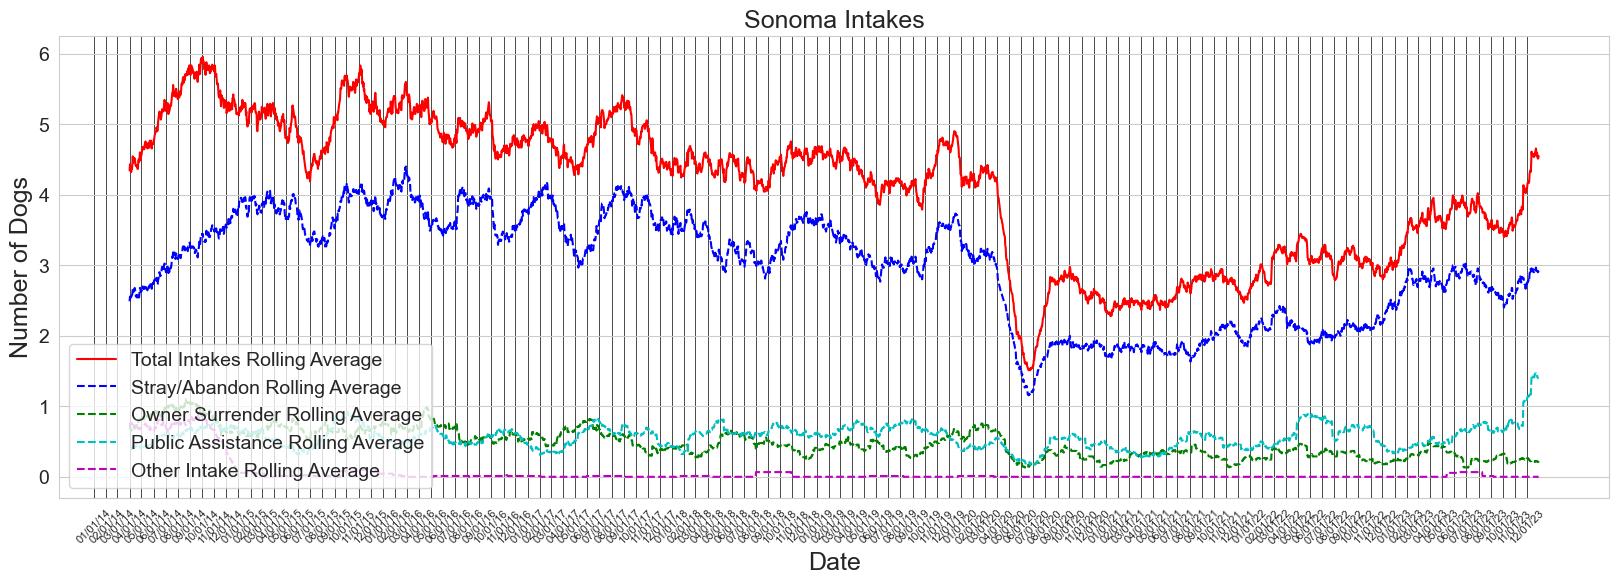

In [147]:
plt.figure(figsize=(20,6))

plt.plot(shelter_train_sonoma.Date, 
         shelter_train_sonoma.SonomaIntakeTotals.rolling(90, closed="left").mean(),
         'r',
         label="Total Intakes Rolling Average")

plt.plot(shelter_train_sonoma.Date, 
         shelter_train_sonoma.Sonoma_intake_stray_abandoned.rolling(90, closed="left").mean(),
         'b--',
         label="Stray/Abandon Rolling Average")

plt.plot(shelter_train_sonoma.Date, 
         shelter_train_sonoma.Sonoma_intake_owner_surrender.rolling(90, closed="left").mean(),
         'g--',
         label="Owner Surrender Rolling Average")

plt.plot(shelter_train_sonoma.Date, 
         shelter_train_sonoma.Sonoma_intake_public_assist.rolling(90, closed="left").mean(),
         'c--',
         label="Public Assistance Rolling Average")

plt.plot(shelter_train_sonoma.Date, 
         shelter_train_sonoma.Sonoma_intake_other_i.rolling(90, closed="left").mean(),
         'm--',
         label="Other Intake Rolling Average")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Dogs", fontsize=18)
plt.title("Sonoma Intakes", fontsize=18)

# Generate major gridline positions (first of each month)
first_month = pd.date_range(start='1/1/14', end='12/31/23', freq='MS')  # Generate first of each month
major_gridline_labels = [date.strftime('%m/%d/%y') for date in first_month]

# Add gridlines with labels
plt.grid(True, which='major', axis='x', linestyle='-', linewidth='0.5', color='black')
plt.xticks(ticks=first_month, labels=major_gridline_labels, rotation=45, fontsize=8)  # Rotate and adjust fontsize as needed


plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()

Let's just look at 2023 and forecasting 2024

In [148]:
# Find first day 2023

first_day23 = shelter_train_sonoma[shelter_train_sonoma['Date'] == '2023-01-01'].index[0]


print(shelter_train_sonoma.Date.iloc[first_day23])

2023-04-03 00:00:00


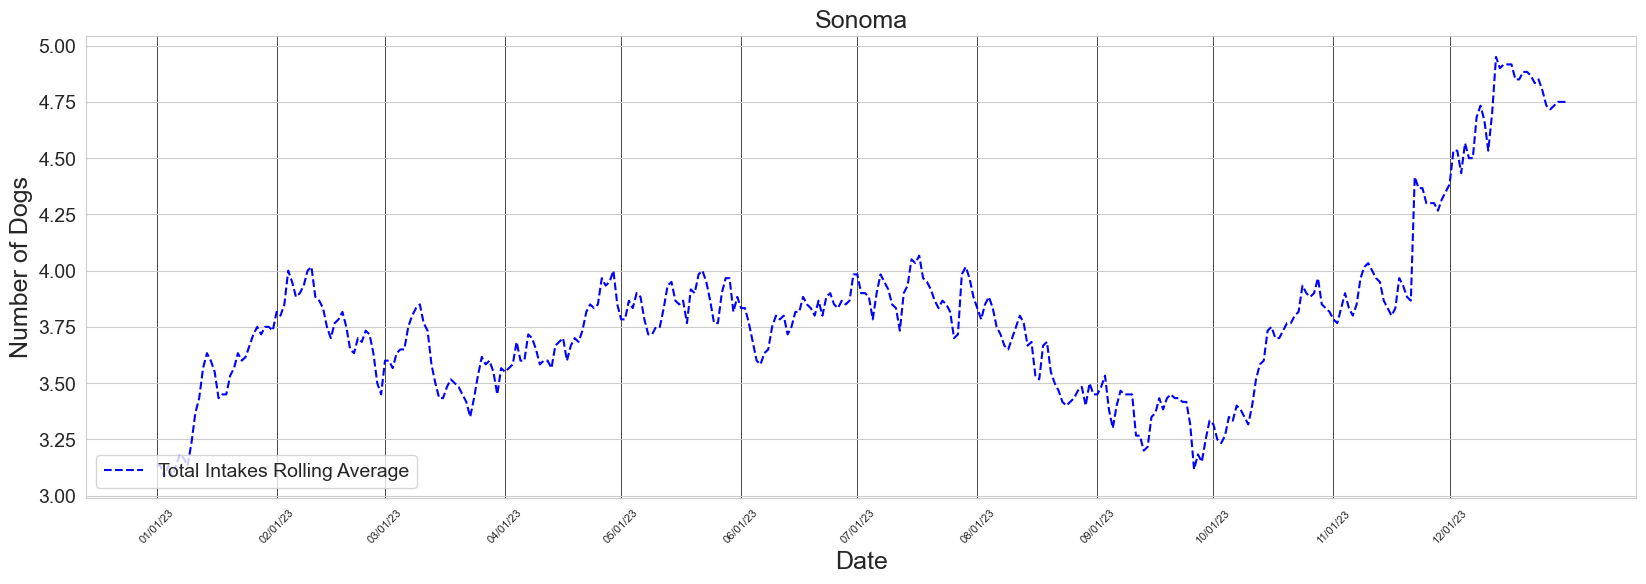

In [149]:
plt.figure(figsize=(20,6))


# plt.plot(shelter_train_sonoma.Date[first_day23:], 
#          shelter_train_sonoma.SonomaIntakeTotals[first_day23:],
#          'g',
#          label="Total Intakes")

plt.plot(shelter_train_sonoma.Date[first_day23-92:], 
         shelter_train_sonoma.SonomaIntakeTotals.rolling(60, closed="left").mean()[first_day23-92:],
         'b--',
         label="Total Intakes Rolling Average")

# plt.plot(shelter_train_sonoma.Date, 
#          shelter_train_sonoma.SonomaOutcomeTotals.rolling(60, closed="left").mean(),
#          'b--',
#          label="Total Outcomes Rolling Average")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Dogs", fontsize=18)
plt.title("Sonoma", fontsize=18)

# Generate major gridline positions (first of each month)
first_month = pd.date_range(start='1/1/23', end='12/31/23', freq='MS')  # Generate first of each month
major_gridline_labels = [date.strftime('%m/%d/%y') for date in first_month]

# Add gridlines with labels
plt.grid(True, which='major', axis='x', linestyle='-', linewidth='0.5', color='black')
plt.xticks(ticks=first_month, labels=major_gridline_labels, rotation=45, fontsize=8)  # Rotate and adjust fontsize as needed


plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()

### Outcomes

In [150]:
Sonoma_trained_averages = pd.DataFrame({'Sonoma_outcome_euthanised':shelter_train_sonoma.Sonoma_outcome_euthanised,
                  'euthanised_rolling_avg':shelter_train_sonoma.Sonoma_outcome_euthanised.rolling(30,
                                                                closed='left').mean(),
                'Sonoma_outcome_adoption':shelter_train_sonoma.Sonoma_outcome_adoption,
                  'adoption_rolling_avg':shelter_train_sonoma.Sonoma_outcome_adoption.rolling(30,
                                                                closed='left').mean(),
                'Sonoma_outcome_return_to_owner':shelter_train_sonoma.Sonoma_outcome_return_to_owner,
                  'return_to_owner_rolling_avg':shelter_train_sonoma.Sonoma_outcome_return_to_owner.rolling(30,
                                                                closed='left').mean(),
                'Sonoma_outcome_unintended':shelter_train_sonoma.Sonoma_outcome_unintended,
                  'outcome_unintended_rolling_avg':shelter_train_sonoma.Sonoma_outcome_unintended.rolling(30,
                                                                closed='left').mean(),
                'Sonoma_outcome_other':shelter_train_sonoma.Sonoma_outcome_other,
                  'outcome_other_rolling_avg':shelter_train_sonoma.Sonoma_outcome_other.rolling(30,
                                                                closed='left').mean(),
                'SonomaOutcomeTotals':shelter_train_sonoma.SonomaOutcomeTotals,
                  'SonomaOutcomeTotals_rolling_avg':shelter_train_sonoma.SonomaOutcomeTotals.rolling(30,
                                                                closed='left').mean()
                                                                })

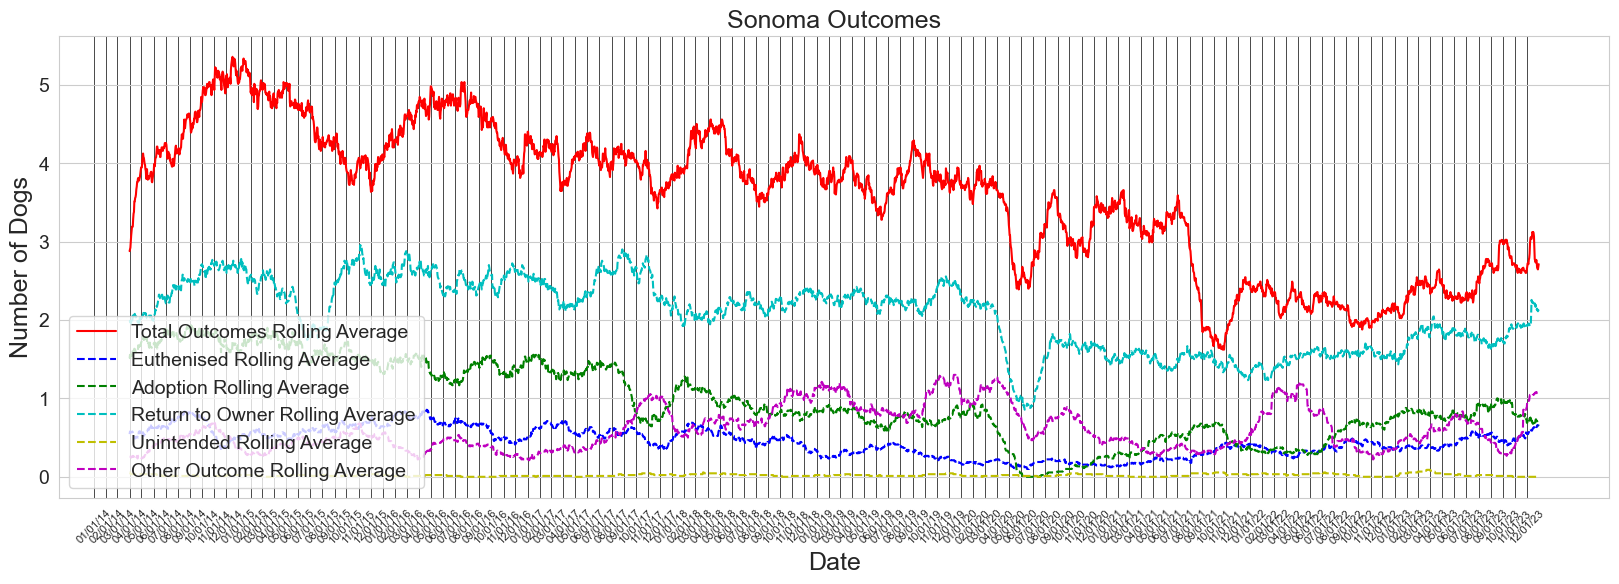

In [151]:
plt.figure(figsize=(20,6))

plt.plot(shelter_train_sonoma.Date, 
         shelter_train_sonoma.SonomaOutcomeTotals.rolling(90, closed="left").mean(),
         'r',
         label="Total Outcomes Rolling Average")

plt.plot(shelter_train_sonoma.Date, 
         shelter_train_sonoma.Sonoma_outcome_euthanised.rolling(90, closed="left").mean(),
         'b--',
         label="Euthenised Rolling Average")

plt.plot(shelter_train_sonoma.Date, 
         shelter_train_sonoma.Sonoma_outcome_adoption.rolling(90, closed="left").mean(),
         'g--',
         label="Adoption Rolling Average")

plt.plot(shelter_train_sonoma.Date, 
         shelter_train_sonoma.Sonoma_outcome_return_to_owner.rolling(90, closed="left").mean(),
         'c--',
         label="Return to Owner Rolling Average")

plt.plot(shelter_train_sonoma.Date, 
         shelter_train_sonoma.Sonoma_outcome_unintended.rolling(90, closed="left").mean(),
         'y--',
         label="Unintended Rolling Average")

plt.plot(shelter_train_sonoma.Date, 
         shelter_train_sonoma.Sonoma_outcome_other.rolling(90, closed="left").mean(),
         'm--',
         label="Other Outcome Rolling Average")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Dogs", fontsize=18)
plt.title("Sonoma Outcomes", fontsize=18)

# Generate major gridline positions (first of each month)
first_month = pd.date_range(start='1/1/14', end='12/31/23', freq='MS')  # Generate first of each month
major_gridline_labels = [date.strftime('%m/%d/%y') for date in first_month]

# Add gridlines with labels
plt.grid(True, which='major', axis='x', linestyle='-', linewidth='0.5', color='black')
plt.xticks(ticks=first_month, labels=major_gridline_labels, rotation=45, fontsize=8)  # Rotate and adjust fontsize as needed


plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()

## Austin 
### Intakes

We will define a rolling average on Stray Abandoned, Owner Surrender, Public Assistance, and Other Intake, as well as total intakes. We believe these different categories are useful to shelters, as they may require different staffing or resources.

In [152]:
Austin_trained_averages = pd.DataFrame({'Date':shelter_train.Date,
                'Austin_intake_stray_abandoned':shelter_train.Austin_Stray_Abandoned,
                  'stray_rolling_avg':shelter_train.Austin_Stray_Abandoned.rolling(30,
                                                                closed='left').mean(),
                'Austin_euth_req':shelter_train.Austin_Euthanasia_Req,
                  'euth_req_rolling_avg':shelter_train.Austin_Euthanasia_Req.rolling(30,
                                                                closed='left').mean(),
                'Austin_intake_owner_surrender':shelter_train.Austin_Owner_Surrender,
                  'owner_surrender_rolling_avg':shelter_train.Austin_Owner_Surrender.rolling(30,
                                                                closed='left').mean(),
                'Austin_public_assist':shelter_train.Austin_Public_Assist,
                  'public_assist_rolling_avg':shelter_train.Austin_Public_Assist.rolling(30,
                                                                closed='left').mean(),
                'Austin_intake_other':shelter_train.Austin_Other,
                  'other_intake_rolling_avg':shelter_train.Austin_Other.rolling(30,
                                                                closed='left').mean(),
                'AustinIntakeTotals':shelter_train.AustinIntakeTotal,
                  'AustinIntakeTotals_rolling_avg':shelter_train.AustinIntakeTotal.rolling(30,
                                                                closed='left').mean()
                                                                })

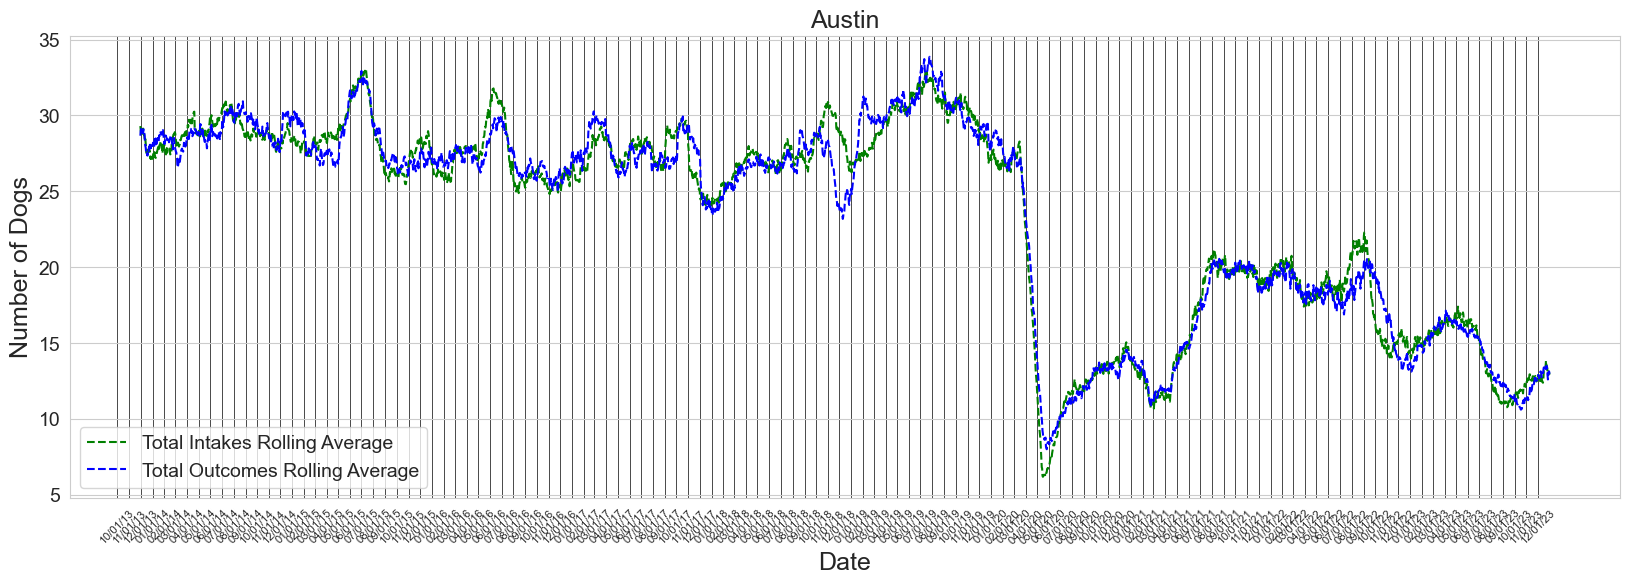

In [153]:
plt.figure(figsize=(20,6))


# plt.plot(shelter_train.Date, 
#          shelter_train.SonomaIntakeTotals,
#          'b',
#          label="Total Intakes")

plt.plot(shelter_train.Date, 
         shelter_train.AustinIntakeTotal.rolling(60, closed="left").mean(),
         'g--',
         label="Total Intakes Rolling Average")

plt.plot(shelter_train.Date, 
         shelter_train.AustinOutcomeTotal.rolling(60, closed="left").mean(),
         'b--',
         label="Total Outcomes Rolling Average")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Dogs", fontsize=18)
plt.title("Austin", fontsize=18)

# Generate major gridline positions (first of each month)
first_month = pd.date_range(start='10/1/13', end='12/31/23', freq='MS')  # Generate first of each month
major_gridline_labels = [date.strftime('%m/%d/%y') for date in first_month]

# Add gridlines with labels
plt.grid(True, which='major', axis='x', linestyle='-', linewidth='0.5', color='black')
plt.xticks(ticks=first_month, labels=major_gridline_labels, rotation=45, fontsize=8)  # Rotate and adjust fontsize as needed


plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()

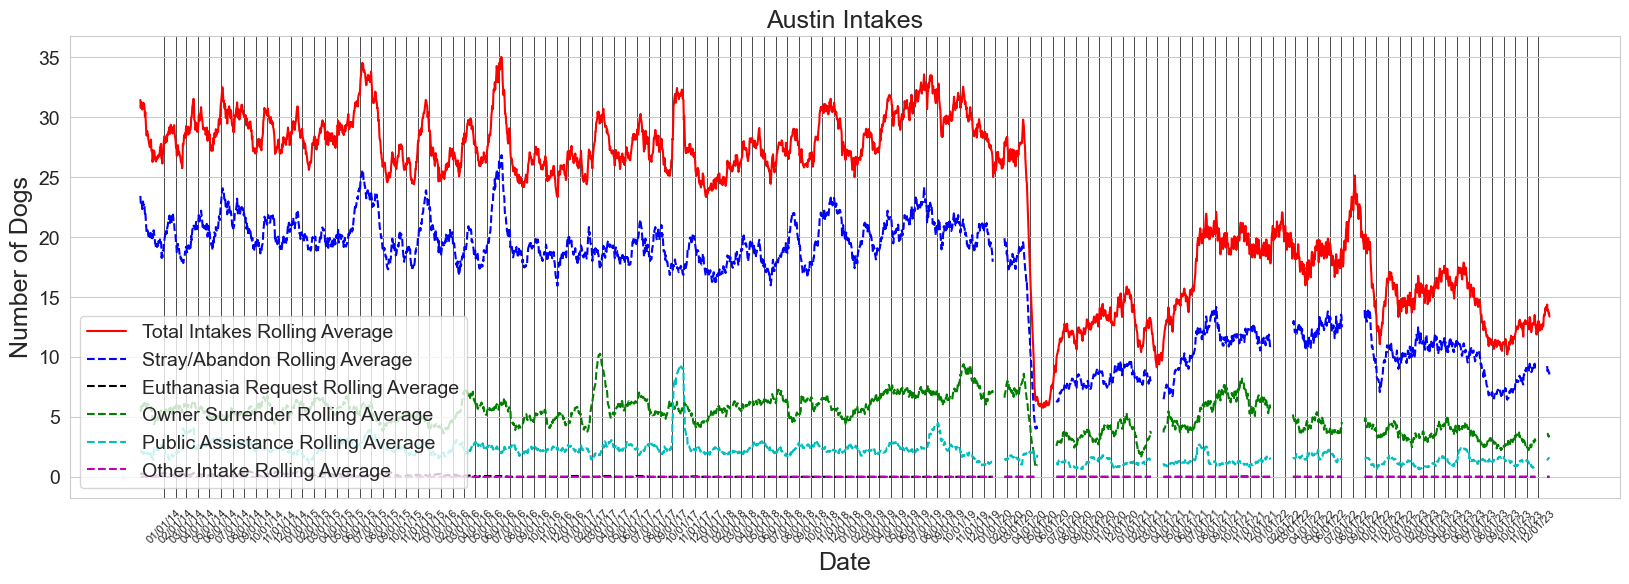

In [154]:
plt.figure(figsize=(20,6))

plt.plot(shelter_train.Date, 
         shelter_train.AustinIntakeTotal.rolling(30, closed="left").mean(),
         'r',
         label="Total Intakes Rolling Average")

plt.plot(shelter_train.Date, 
         shelter_train.Austin_Stray_Abandoned.rolling(30, closed="left").mean(),
         'b--',
         label="Stray/Abandon Rolling Average")

plt.plot(shelter_train.Date, 
         shelter_train.Austin_Euthanasia_Req.rolling(30, closed="left").mean(),
         'k--',
         label="Euthanasia Request Rolling Average")

plt.plot(shelter_train.Date, 
         shelter_train.Austin_Owner_Surrender.rolling(30, closed="left").mean(),
         'g--',
         label="Owner Surrender Rolling Average")

plt.plot(shelter_train.Date, 
         shelter_train.Austin_Public_Assist.rolling(30, closed="left").mean(),
         'c--',
         label="Public Assistance Rolling Average")

plt.plot(shelter_train.Date, 
         shelter_train.Austin_Other.rolling(30, closed="left").mean(),
         'm--',
         label="Other Intake Rolling Average")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Dogs", fontsize=18)
plt.title("Austin Intakes", fontsize=18)

# Generate major gridline positions (first of each month)
first_month = pd.date_range(start='1/1/14', end='12/31/23', freq='MS')  # Generate first of each month
major_gridline_labels = [date.strftime('%m/%d/%y') for date in first_month]

# Add gridlines with labels
plt.grid(True, which='major', axis='x', linestyle='-', linewidth='0.5', color='black')
plt.xticks(ticks=first_month, labels=major_gridline_labels, rotation=45, fontsize=8)  # Rotate and adjust fontsize as needed


plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()

### Outcomes

In [155]:

Austin_trained_averages = pd.DataFrame({'Austin_outcome_euthanised':shelter_train.Austin_outcome_euthanised,
                  'euthanised_rolling_avg':shelter_train.Austin_outcome_euthanised.rolling(30,
                                                                closed='left').mean(),
                'Austin_outcome_adoption':shelter_train.Sonoma_outcome_adoption,
                  'adoption_rolling_avg':shelter_train.Sonoma_outcome_adoption.rolling(30,
                                                                closed='left').mean(),
                'Austin_outcome_return_to_owner':shelter_train.Sonoma_outcome_return_to_owner,
                  'return_to_owner_rolling_avg':shelter_train.Sonoma_outcome_return_to_owner.rolling(30,
                                                                closed='left').mean(),
                'Austin_outcome_unintended':shelter_train.Austin_outcome_unintended,
                  'outcome_unintended_rolling_avg':shelter_train.Austin_outcome_unintended.rolling(30,
                                                                closed='left').mean(),
                'Austin_outcome_other':shelter_train.Austin_outcome_other,
                  'outcome_other_rolling_avg':shelter_train.Austin_outcome_other.rolling(30,
                                                                closed='left').mean(),
                'AustinOutcomeTotals':shelter_train.AustinOutcomeTotal,
                  'AustinOutcomeTotals_rolling_avg':shelter_train.AustinOutcomeTotal.rolling(30,
                                                                closed='left').mean()
                                                                })


AttributeError: 'DataFrame' object has no attribute 'Austin_outcome_euthanised'

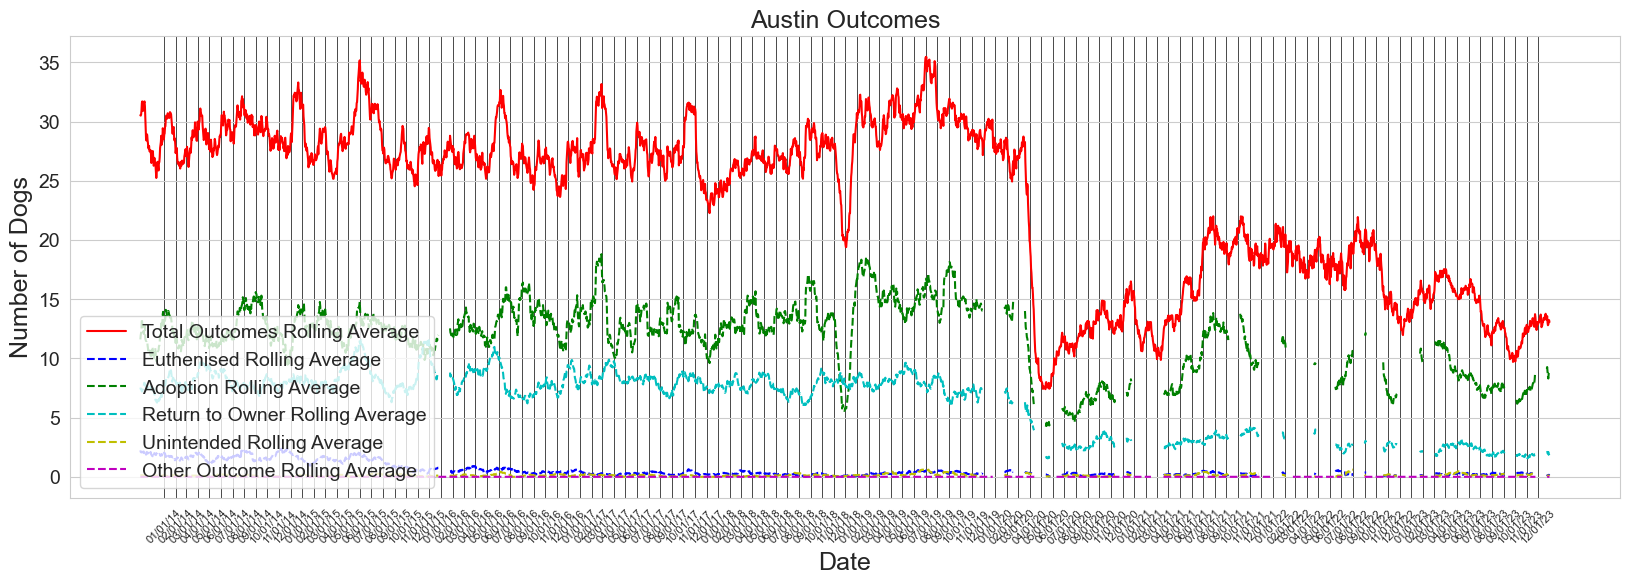

In [ ]:
plt.figure(figsize=(20,6))

plt.plot(shelter_train.Date, 
         shelter_train.AustinOutcomeTotal.rolling(30, closed="left").mean(),
         'r',
         label="Total Outcomes Rolling Average")

plt.plot(shelter_train.Date, 
         shelter_train.Austin_Euth.rolling(30, closed="left").mean(),
         'b--',
         label="Euthenised Rolling Average")

plt.plot(shelter_train.Date, 
         shelter_train.Austin_Adopt.rolling(30, closed="left").mean(),
         'g--',
         label="Adoption Rolling Average")

plt.plot(shelter_train.Date, 
         shelter_train.Austin_RTO.rolling(30, closed="left").mean(),
         'c--',
         label="Return to Owner Rolling Average")

plt.plot(shelter_train.Date, 
         shelter_train.Austin_Unintended.rolling(30, closed="left").mean(),
         'y--',
         label="Unintended Rolling Average")

plt.plot(shelter_train.Date, 
         shelter_train.Austin_Other.rolling(30, closed="left").mean(),
         'm--',
         label="Other Outcome Rolling Average")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Dogs", fontsize=18)
plt.title("Austin Outcomes", fontsize=18)

# Generate major gridline positions (first of each month)
first_month = pd.date_range(start='1/1/14', end='12/31/23', freq='MS')  # Generate first of each month
major_gridline_labels = [date.strftime('%m/%d/%y') for date in first_month]

# Add gridlines with labels
plt.grid(True, which='major', axis='x', linestyle='-', linewidth='0.5', color='black')
plt.xticks(ticks=first_month, labels=major_gridline_labels, rotation=45, fontsize=8)  # Rotate and adjust fontsize as needed


plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()